# K-Means Clustering

In [10]:
#importing Libraries

import pandas as pd
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# importing Dataset

X = pd.read_csv ("Mall_Customers.csv")
x_train = X.iloc[:,3:].values
X.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Using the elbow  to find the optimal number of clusters

1- Kmeans (n_clusters = ... , init =...., random_state =...).fit(X)

    1.1- n_clusters -> default=8
         The number of clusters to form as well as the number of centroids to generate.

    1.2- init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

    Notes: ’k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See            section Notes in k_init for more details.

    1.3- random_state: int, RandomState instance or None, default=None
    Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
    you can start with 0 ( random_state = 0 )

    1.4 -fit(X) : Compute k-means clustering.

In [54]:
#Distortion: It is calculated as the average of the squared distances from the cluster centers
#of the respective clusters. Typically, the Euclidean distance metric is used.

distortions = []
from sklearn.cluster import KMeans
K = range (1,10)
for i in K:
    # write Kmeans function with i n_clusters
    kmeans = KMeans(n_clusters=i).fit(x_train)
    # end code here
    distortions.append(kmeans.inertia_)    # the sum of all distances between each point and its ceteroid
print(distortions)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37239.83554245604, 30259.657207285458, 25018.781613414074, 21826.936303231643]


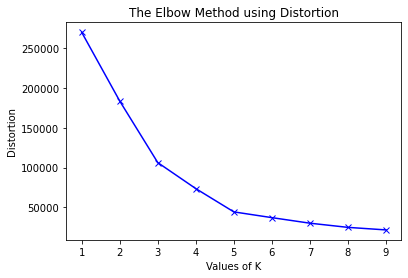

In [55]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show() 

fit_predict(X) : Compute cluster centers and predict cluster index for each sample.

KMeans(n_clusters = ...., init = 'k-means++', random_state = ....)


In [68]:
# Fitting K-Means to the dataset using fit_predict and
# using K getting from above graph 

# start code here (1 lines)
kmeans = KMeans(n_clusters=5).fit(x_train) # from the graph tthe elbow point is at k = 3 and k = 5 , so we will choose the 5
y_kmeans = kmeans.predict(x_train)

# end code here

# Now Plotting Dataset with Clusters

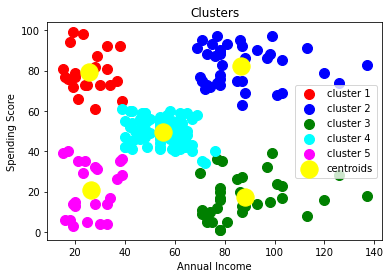

In [69]:
# plotting Dataset

plt.scatter(x_train[y_kmeans ==0,0],x_train[y_kmeans == 0,1],s = 100, c = 'red',label = 'cluster 1')
plt.scatter(x_train[y_kmeans ==1,0],x_train[y_kmeans == 1,1],s = 100, c = 'blue',label = 'cluster 2')
plt.scatter(x_train[y_kmeans ==2,0],x_train[y_kmeans == 2,1],s = 100, c = 'green',label = 'cluster 3')
plt.scatter(x_train[y_kmeans ==3,0],x_train[y_kmeans == 3,1],s = 100, c = 'cyan',label = 'cluster 4')
plt.scatter(x_train[y_kmeans ==4,0],x_train[y_kmeans == 4,1],s = 100, c = 'magenta',label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300 ,c = 'yellow',label= 'centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters')
plt.legend()
plt.show()

In [71]:
print(kmeans.predict(np.array([50,50]).reshape(1,-1)))
print(y_kmeans)

[3]
[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
